# Will A customer Accept Bank's Term Deposit?

## 1. Project Description

#### This project aims to predict whether a client will subscribe to a bank term deposit based on historical data from direct marketing campaigns conducted by a Portuguese banking institution. The dataset contains various attributes related to the clients' demographic information, banking history, and details about the marketing campaign.

#### The aim is to develop a classification model that can help the bank target potential customers more effectively, thereby increasing the success rate of their marketing campaigns.

## 2. Dataset Understanding

The dataset used for this project is `bank-full.csv`, [Download](https://archive.ics.uci.edu/dataset/222/bank+marketing), which contains data from direct marketing campaigns. The dataset consists of 17 input variables and one target variable `y`. The target variable `y` indicates whether a client has subscribed to a term deposit `yes` or not `no`.

* The dataset consists of 4521 records.
* the dataset does not have missing values

### 2.1. The variables/Features used for this project are:

1. `age` which is an integer
2. `job` which explains the type of job (categorical: `admin`,`blue-collar`,`entrepreneur`,`housemaid`,`management`,`retired`,`self-employed`,`services`,`student`,`technician`,`unemployed`,`unknown`)
3. `marital` which is marital status (categorical: `divorced`,`married`,`single`,`unknown`; note: 'divorced' means divorced or widowed)
4. `default` which explains if the customer has credit in default - Binary
5. `balance` which is the average yearly balance - Integer
6. `housing` which is if the customer has housing loan - binary
7. `loan` which is if the client has personal loan - binary
8. `campaign` which is the number of contacts performed during this campaign and for this client (numeric, includes last contact)
9. `poutcome` explains the outcome of the previous marketing campaign (categorical: `failure`,`nonexistent`,`success`)
10. `y` which is the target. has the client subscribed a term deposit?

## 3. Data Understanding and Preprocessing

### 3.1 Importing Libraries

In [33]:
# importing libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE

### 3.2 Load dataset

In [22]:
# loading the dataset

# relevant columns
selected_columns = ['age', 'job', 'marital', 'default', 'balance', 'housing', 'loan', 'campaign', 'poutcome', 'y']

# Load the dataset
data = pd.read_csv('Data/bank.csv', delimiter=';', usecols=selected_columns)

# Display the first 5 rows of the dataframe
data.head()

,age,job,marital,default,balance,housing,loan,campaign,poutcome,y
0,30,unemployed,married,no,1787,no,no,1,unknown,no
1,33,services,married,no,4789,yes,yes,1,failure,no
2,35,management,single,no,1350,yes,no,1,failure,no
3,30,management,married,no,1476,yes,yes,4,unknown,no
4,59,blue-collar,married,no,0,yes,no,1,unknown,no


### 3.3 Visualizing outcome distribution

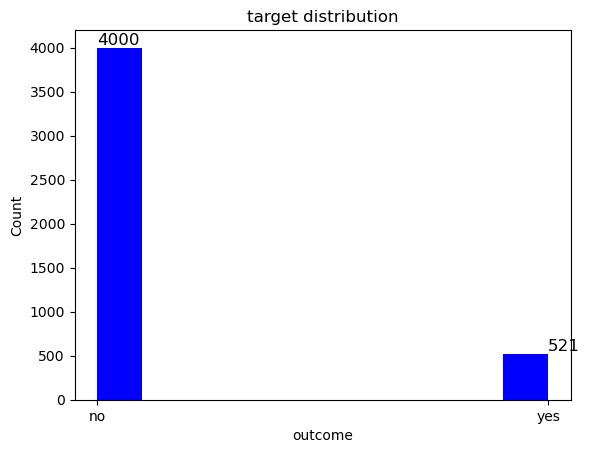

In [30]:
plt.hist(data.y, color='blue')
plt.title('target distribution')
plt.xlabel('outcome')
plt.ylabel('Count')

# Add value counts on top of the bars
value_counts = data['y'].value_counts()
for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), va='bottom', fontsize=12)

plt.show()

From the distribution, the number of `yes` is 521 which is 11.7% of the whole dataset. Meaning the data is highly imbalanced to the no outcomes and a model can be 89% right by classifying all as `no` which will not be a good outcome.

We will apply `SMOTE` from `imblearn` module to handle the class imbalance

## 4 Target and features splitting

### 4.1 features and target

In [34]:
# Define features and target
X = data.drop('y', axis=1)
y = data['y']

### 4.2 test-train split

In [35]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4.3 One Hot Encoding

In [39]:
# Encoding categorical variables
categorical_cols = ['job', 'marital', 'default', 'housing', 'loan', 'poutcome']

X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

### 4.4 Apply smote to handle the class imbalance

SMOTE is an oversampling technique where the synthetic samples are generated for the minority class

In [40]:
# Apply SMOTE for class imbalance

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

### 4.5 Scaling Numerical Features

In [42]:
# Scaling numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5 Modelling